In [1]:
## Q1. What is the mathematical formula for a linear SVM?
'''The mathematical formula for a linear SVM is defined by the function that defines the linear kernel: f (X) = w^T * X + b. 
In this equation, w is the weight vector that you want to minimize, X is the data that you’re trying to classify, and b is the linear coefficient estimated from the training data. 
This equation defines the decision boundary that the SVM returns.'''

'The mathematical formula for a linear SVM is defined by the function that defines the linear kernel: f (X) = w^T * X + b. \nIn this equation, w is the weight vector that you want to minimize, X is the data that you’re trying to classify, and b is the linear coefficient estimated from the training data. \nThis equation defines the decision boundary that the SVM returns.'

In [2]:
## Q2. What is the objective function of a linear SVM?
'''The objective function of a linear SVM is to find the maximum margin separating hyperplane. 
The margin is defined as the distance between the hyperplane and the closest data points from each class. 
The objective function of a linear SVM is to maximize this margin while minimizing the classification error.'''

'The objective function of a linear SVM is to find the maximum margin separating hyperplane. \nThe margin is defined as the distance between the hyperplane and the closest data points from each class. \nThe objective function of a linear SVM is to maximize this margin while minimizing the classification error.'

In [3]:
## Q3. What is the kernel trick in SVM?
'''The kernel trick is a method used in kernel support vector machines (SVMs) which are a popular type of machine learning model. 
Kernel SVMs use the kernel function to map the data into a higher-dimensional space, where they learn a linear model. 
The function of the kernel trick is to map the low-dimensional input space and transform it into a higher dimensional space. 
This allows for non-linearly separable data to be separated by a hyperplane in the higher-dimensional space.'''

'The kernel trick is a method used in kernel support vector machines (SVMs) which are a popular type of machine learning model. \nKernel SVMs use the kernel function to map the data into a higher-dimensional space, where they learn a linear model. \nThe function of the kernel trick is to map the low-dimensional input space and transform it into a higher dimensional space. \nThis allows for non-linearly separable data to be separated by a hyperplane in the higher-dimensional space.'

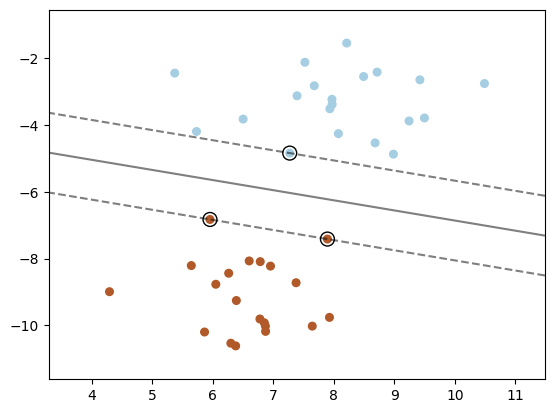

In [4]:
## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?
'''SVMs work by finding the hyperplane that maximizes the margin between two classes of data. 
The hyperplane is defined as the line that separates two classes of data points. 
The margin is defined as the distance between the hyperplane and the closest data points from each class.
In Hard Margin SVM, all data points must be outside the area between margin lines. 
The vector w is orthogonal to the hyperplane. Negative hyperplane and positive hyperplane are the margin lines.Hyperplane, also named the Decision boundary lies right in the middle of the margin lines.
In Soft Margin SVM, we allow misclassifications to happen. So we’ll need to minimize the misclassification error, which means that we’ll have to deal with one more constraint.'''
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

## Q6. SVM Implementation through Iris dataset.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing set

~ Train a linear SVM classifier on the training set and predict the labels for the testing set

~ Compute the accuracy of the model on the testing set

~ Plot the decision boundaries of the trained model using two of the features

~ Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
iris = load_iris()
X = iris.data[:, :2]  # we will only consider the first two features
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


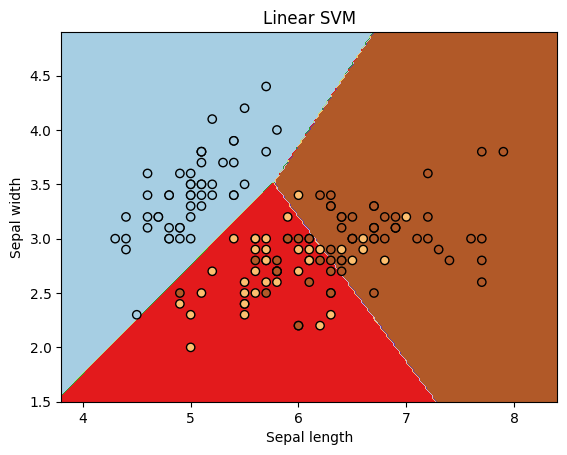

In [8]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # grid step
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Linear SVM')
plt.show()

In [9]:
C_values = [0.1, 1, 10]
for C in C_values:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy for C={}: {}".format(C, accuracy))

Accuracy for C=0.1: 0.8222222222222222
Accuracy for C=1: 0.8
Accuracy for C=10: 0.8
